----

******

# - **🚧 PROJET WALMART** 🛍️ 📈

##### **Doriane DOYON-DOUSSE** : *Certification bloc 3* ✅  (**ds_fs_od_03** 📖) 

******

## 🔷 **PART 1️⃣** : EDA & Preprocessing data 🔧 

---

### ➡️ **Importation of librairies** 📚

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

In [1]:
# Importation of data manipulation libraries 
# -----------------------------------------------------------------------------
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

# Importation of graph libraries 
# -----------------------------------------------------------------------------
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objects as go 
import plotly.figure_factory as ff 

# Importation of Machine learning libraries
# -----------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

### ➡️ **Reading the Dataset** 📚

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

In [2]:
print('Lecture of the dataset ...')
walmart = pd.read_csv('Walmart_Store_sales.csv')
print('...Done!')

Lecture of the dataset ...
...Done!


### ➡️ **Exploratory Data Analysis** 🔎

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

In [3]:
print('*************************************************************************************************************')
print('-------------------------- W A L M A R T   D A T A S E T   B A S I C   I N F O S ----------------------------')
print('*************************************************************************************************************')
print()
print()
print()

print("********** The shape of the Walmart Dataset : **********")
print()
print(f'The Walmart dataset is composed of {walmart.shape[0]} rows and {walmart.shape[1]} columns.')
print()
print('-------------------------------------------------------------------------------------------------------------')
print()

print("********** Let's have a first look at the dataset visualizing the first 5 rows : **********")
print()
display(round(walmart.head(), 2))
print()
print('-------------------------------------------------------------------------------------------------------------')
print()

print('********** Here are some basic statistics about the dataset : **********')
print()
display(round(walmart.describe(include='all'), 2))
print()
print('-------------------------------------------------------------------------------------------------------------')
print()

print(' ********** % Percentage of missing values : **********')
print()
print(round(walmart.isnull().sum()*100/len(walmart), 2))
print()
print('-------------------------------------------------------------------------------------------------------------')
print()

print('********** Listing the column names : **********')
print()
print([col for col in walmart.columns])
print()
print('-------------------------------------------------------------------------------------------------------------')
print()

print('********** Checking for more information : **********')
print()
print(walmart.info())
print()
print('-------------------------------------------------------------------------------------------------------------')
print()

print('********** Checking for Duplicates : **********')
print()
duplicates = walmart.duplicated().sum()
print(f'The Walmart dataset contains {duplicates} duplicates')

print()
print()
print('*************************************************************************************************************')
print('*************************************************************************************************************')

*************************************************************************************************************
-------------------------- W A L M A R T   D A T A S E T   B A S I C   I N F O S ----------------------------
*************************************************************************************************************



********** The shape of the Walmart Dataset : **********

The Walmart dataset is composed of 150 rows and 8 columns.

-------------------------------------------------------------------------------------------------------------

********** Let's have a first look at the dataset visualizing the first 5 rows : **********



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.04,214.78,6.86
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.44,128.62,7.47
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.72,5.94
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.56,7.35
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.76,212.41,7.09



-------------------------------------------------------------------------------------------------------------

********** Here are some basic statistics about the dataset : **********



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.00,132,136.00,138.00,132.00,136.00,138.00,135.00
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.87,NaN,1249535.83,0.08,61.40,3.32,179.90,7.60
std,6.23,NaN,647463.04,0.27,18.38,0.48,40.27,1.58
min,1.00,NaN,268929.03,0.00,18.79,2.51,126.11,5.14
25%,4.00,NaN,605075.72,0.00,45.59,2.85,131.97,6.60
50%,9.00,NaN,1261423.86,0.00,62.98,3.45,197.91,7.47
75%,15.75,NaN,1806386.20,0.00,76.34,3.71,214.93,8.15



-------------------------------------------------------------------------------------------------------------

 ********** % Percentage of missing values : **********

Store            0.00
Date            12.00
Weekly_Sales     9.33
Holiday_Flag     8.00
Temperature     12.00
Fuel_Price       9.33
CPI              8.00
Unemployment    10.00
dtype: float64

-------------------------------------------------------------------------------------------------------------

********** Listing the column names : **********

['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

-------------------------------------------------------------------------------------------------------------

********** Checking for more information : **********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         

##### 🔹 **Description of the variables - Here some more infos** : 
* 🔗 **CPI (X)** : Prevailing consumer price index
 I personally did not know what was the CPI so here some of my researches 
 Is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer. Indice des prix à la consommation (Consumer price index) : In general, a low CPI is better than a very high one.
   
        - QUANTITATIVE  : indices are numerical (Max = 226.96 / min = 126.11)
* 🔗 **Fuel_price (X)** : Cost of fuel in the region

        - QUANTITATIVE : The min is 2,51 dollars/L  and max is 4,19/L --> so 20 stores to analyse in total 
* 🔗 **Unemployment (X)** : Prevailing unemployment rate (Taux de chômage actuel)

        - QUANTITATIVE : it is a rate so numerical
* 🔗 **Temperature (X)** : Temperature on the day of sale

        - QUANTITATIVE : Seems to be in Fahrenheit  (max =91.65 / min = 18.79)
* 🔗 **Holiday_Flag (X)** : Whether the week is a special holiday week 

        - CATEGORIAL : 0 = No  / 1 = Yes 
* 🔗 **Store (X)** : The store number

        - CATEGORICAL : At first view, it seemed quantitive but when The min is 1 and max is 20 --> so 20 stores to analyse in total 
* 🔗 **Date (X)** : The week of sales

        - QUANTITATIVE : dates are numerical data (needs to be modified as datatime type)

* 💥 **WEEKLY SALES (Y : our target variable)** 💥: The week of sales

        - QUANTITATIVE : sales are money --> obsiously numerical data (min= 1.8MM / max = 2.77MM)

#### 🔸  **We never use imputation technics on the target (to avoid biais): so let's suppress missing values !**

In [4]:
# Dropping missing values in the target variable 'Weekly_Sales'
# --------------------------------------------------------------------------------
target_miss_val = walmart['Weekly_Sales'].isna() 
walmart = walmart[target_miss_val == False]
ws_perc_mval = round(walmart['Weekly_Sales'].isnull().sum()*100/len(walmart), 2)

print(f"Missing values in 'Weekly_sales' : {ws_perc_mval} %")

Missing values in 'Weekly_sales' : 0.0 %


#### 🔹 **What can we say from our Walmart Dataset basic Infos extracted just before ?**

* We are dealing with a pretty **small dataset** : *150 rows and 8 columns*. What a relief for us, because usually in ML, dataset can be udge. Good news here!

* In the previous markdown we have some more informations about the description of the columns.

* *Except for the 'Store' column* **all columns have missing values** but not in excessive percentages so we can keep all of them. Later on, we will need to replace them thanks to *SimpleImputer()*, with different type of strategy.

* *The .info() command* : we can see that the type of the **Date column is object --> let's directely put it into datetime** for better interpretation and computation if needed 

* **No duplicates** present in the dataset 

In [5]:
# Transform the Date column data type into date format 
# --------------------------------------------------------------------------------

print('Changing the type of the Date Column ...')
print()
walmart['Date'] = pd.to_datetime(walmart['Date'], format ="%d-%m-%Y")
print(walmart['Date'])
print()
print('...Done.')

Changing the type of the Date Column ...

0     2011-02-18
1     2011-03-25
3            NaT
4     2010-05-28
5     2010-05-28
         ...    
145   2010-06-18
146          NaT
147   2010-06-11
148   2011-08-12
149   2012-04-20
Name: Date, Length: 136, dtype: datetime64[ns]

...Done.


##### 🔹 **In order to have usable time datas, we will create new columns from the 'Date' column and drop the original one:** 

* **Year** : The year extracted from the 'Date' column 

* **Month** : The month in numbers extracted from the 'Date' column

* **Day** : Day of the month in number extracted from the 'Date' column

* **Day of week** : Day of the week in number extracted from the 'Date' column




In [6]:
# Creating a new column called Year from the original 'Date' column
# -------------------------------------------------------------------------------------
walmart['Year'] = walmart['Date'].dt.year

# Creating a new columns called Month from the original 'Date' column
# -------------------------------------------------------------------------------------
walmart['Month_Num'] = walmart['Date'].dt.month # numerical variable of month
walmart['Month_Cat'] = walmart['Date'].dt.month_name() # categorical variable of month

# Creating a new columns called Day from the original 'Date' column
# -------------------------------------------------------------------------------------
walmart['Day_Num'] = walmart['Date'].dt.day # numerical variable of day
walmart['Day_Cat'] = walmart['Date'].dt.day_name() # categorical variable of day

# Creating a new column called Day of Week from the original 'Date' column
# -------------------------------------------------------------------------------------
walmart['Day_of_Week'] = walmart['Date'].dt.weekday

new_cols = ['Year', 'Month', 'Day', 'Day_of_Week']


# -------------------------------------------------------------------------------------
print('New columns has been added to the dataset :', new_cols)
print()
print("Dropping the 'Date' column..." )
walmart = walmart.drop(columns=['Date'], axis=1)
print("...Done" )

display(walmart.head())

New columns has been added to the dataset : ['Year', 'Month', 'Day', 'Day_of_Week']

Dropping the 'Date' column...
...Done


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month_Num,Month_Cat,Day_Num,Day_Cat,Day_of_Week
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,February,18.0,Friday,4.0
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,March,25.0,Friday,4.0
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,May,28.0,Friday,4.0
5,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010.0,5.0,May,28.0,Friday,4.0


##### 🔸 Let's add the Celcius **Temperature column** for fun: 

 * Wouldn't be nice if we add a new column with the temprature in degrees celcius ? Let's create a new column **Temp_Celcius**

 * Just for fun because we are french and don't use the same metric as Americans

 * Useless for the futur model and will have collinearity with Temp_Fahrenheit, so we will have to choose one or an another.

 * Let's rename the ancient 'Temperature' column by **'Temp_Fahrenheit'**

In [7]:
# Adding a new temperature column for fun (useless for machine learning model)
# -------------------------------------------------------------------------------------
print('Creeating a new colum Temp Celcius...')
print()
walmart['Temp_Celcius'] = round((walmart['Temperature'] - 32) *5/9, 2)
print(walmart['Temp_Celcius'])
print()
print('... Done.')

Creeating a new colum Temp Celcius...

0      15.34
1       5.77
3      29.21
4      26.05
5        NaN
       ...  
145    22.57
146    -6.26
147    13.97
148    30.03
149    12.89
Name: Temp_Celcius, Length: 136, dtype: float64

... Done.


In [8]:
# Renaming columns so they are have more explicit meaning
# -------------------------------------------------------------------------------------
print("Renaming 'Temperature' column by 'Temp_Fahrenheit'...")
print("Renaming 'Holiday_Flag' column by 'Holiday_Period_or_Not'...")
print()

walmart.rename({'Temperature': 'Temp_Fahrenheit'}, axis = 1, inplace = True)
walmart.rename({'Holiday_Flag': 'Holiday_or_Not'}, axis = 1, inplace = True)
display(walmart.head())

print()
print('... Done.')

Renaming 'Temperature' column by 'Temp_Fahrenheit'...
Renaming 'Holiday_Flag' column by 'Holiday_Period_or_Not'...



,Store,Weekly_Sales,Holiday_or_Not,Temp_Fahrenheit,Fuel_Price,CPI,Unemployment,Year,Month_Num,Month_Cat,Day_Num,Day_Cat,Day_of_Week,Temp_Celcius
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,February,18.0,Friday,4.0,15.34
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,March,25.0,Friday,4.0,5.77
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN,NaN,NaN,29.21
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,May,28.0,Friday,4.0,26.05
5,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010.0,5.0,May,28.0,Friday,4.0,NaN



... Done.


##### 🔹 **Next mission for us is to drop lines containing invalid values or outliers :** 

* **X(bar)+3σ** : All numerical features that are **3 times the standard deviation away from the mean of the sample (positive side)** --> meaning **we alrealdy cover 99% off the value of the dataset without those positives outliers** that could *biais* our Supervised Machine Learning model 

* **X(bar)-3σ** : All numerical features that are **3 times the standard deviation away from the mean of the sample (negative side)** --> meaning **we alrealdy cover 99% off the value of the dataset without those negatives outliers** that could *biais* our Supervised Machine Learning model 

        - Columns concerned : Temperature, Fuel_price, CPI and Unemployment


In [9]:
print('****************************************************')
print('------- R E M O V I N G    O U T L I E R S... ------')
print('****************************************************')

print()
print()

# Temperature outliers removal: 
# ---------------------------------------------------------------------------------------------------------
temp_up_bound = walmart['Temp_Fahrenheit'].mean() + (3 * walmart['Temp_Fahrenheit'].std())
temp_low_bound = walmart['Temp_Fahrenheit'].mean() - (3 * walmart['Temp_Fahrenheit'].std())
temp_mask = (walmart['Temp_Fahrenheit'] < temp_up_bound) & (walmart['Temp_Fahrenheit'] > temp_low_bound)

# Fuel_Price ouliers removal :
# ---------------------------------------------------------------------------------------------------------
fuel_up_bound = walmart['Fuel_Price'].mean() + (3 * walmart['Fuel_Price'].std())
fuel_low_bound = walmart['Fuel_Price'].mean() - (3 * walmart['Fuel_Price'].std())
fuel_mask = (walmart['Fuel_Price'] < fuel_up_bound) & (walmart['Fuel_Price'] > fuel_low_bound)

# CPI outliers removal :
# ---------------------------------------------------------------------------------------------------------
cpi_up_bound = walmart['CPI'].mean() + (3 * walmart['CPI'].std())
cpi_low_bound = walmart['CPI'].mean() - (3 * walmart['CPI'].std())
cpi_mask = (walmart['CPI'] < cpi_up_bound) & (walmart['CPI'] > cpi_low_bound)

# Unemployment outliers removal : 
# ---------------------------------------------------------------------------------------------------------
unemp_up_bound = walmart['Unemployment'].mean() + (3 * walmart['Unemployment'].std())
unemp_low_bound = walmart['Unemployment'].mean() - (3 * walmart['Unemployment'].std())
unemp_mask = (walmart['Unemployment'] < unemp_up_bound) & (walmart['Unemployment'] > unemp_low_bound)

# Filtering & printing results
# ---------------------------------------------------------------------------------------------------------
walmart = walmart.loc[temp_mask, :]
walmart = walmart.loc[fuel_mask, :]
walmart = walmart.loc[cpi_mask, :]
walmart = walmart.loc[unemp_mask, :]

print("Before removing outliers : 150 rows")
print()
print('                    .')
print('                    .')
print('                    .')
print('                    .')
print('                    .')
print()
print("After removing outliers : ", walmart.shape[0], "rows")

print()
print()

print('****************************************************')
print('------------------- ... D o n e . ------------------')
print('****************************************************')

****************************************************
------- R E M O V I N G    O U T L I E R S... ------
****************************************************


Before removing outliers : 150 rows

                    .
                    .
                    .
                    .
                    .

After removing outliers :  90 rows


****************************************************
------------------- ... D o n e . ------------------
****************************************************


-----

# 🔶 **Visualizations :** understand variables with graphs 👀📊

----

## _____ 👉 **UNIVARIATE ANALYSIS** : Let's first explore every **variable individualy** : _____

### __________________________ 🔢 **NUMERICAL VARIABLES** 🔢 __________________________

🟢 We will separate plots into **dates**, **target** and **other numerical variables** : 

##### ⇢ **Right now let's see our TARGET**  👀

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

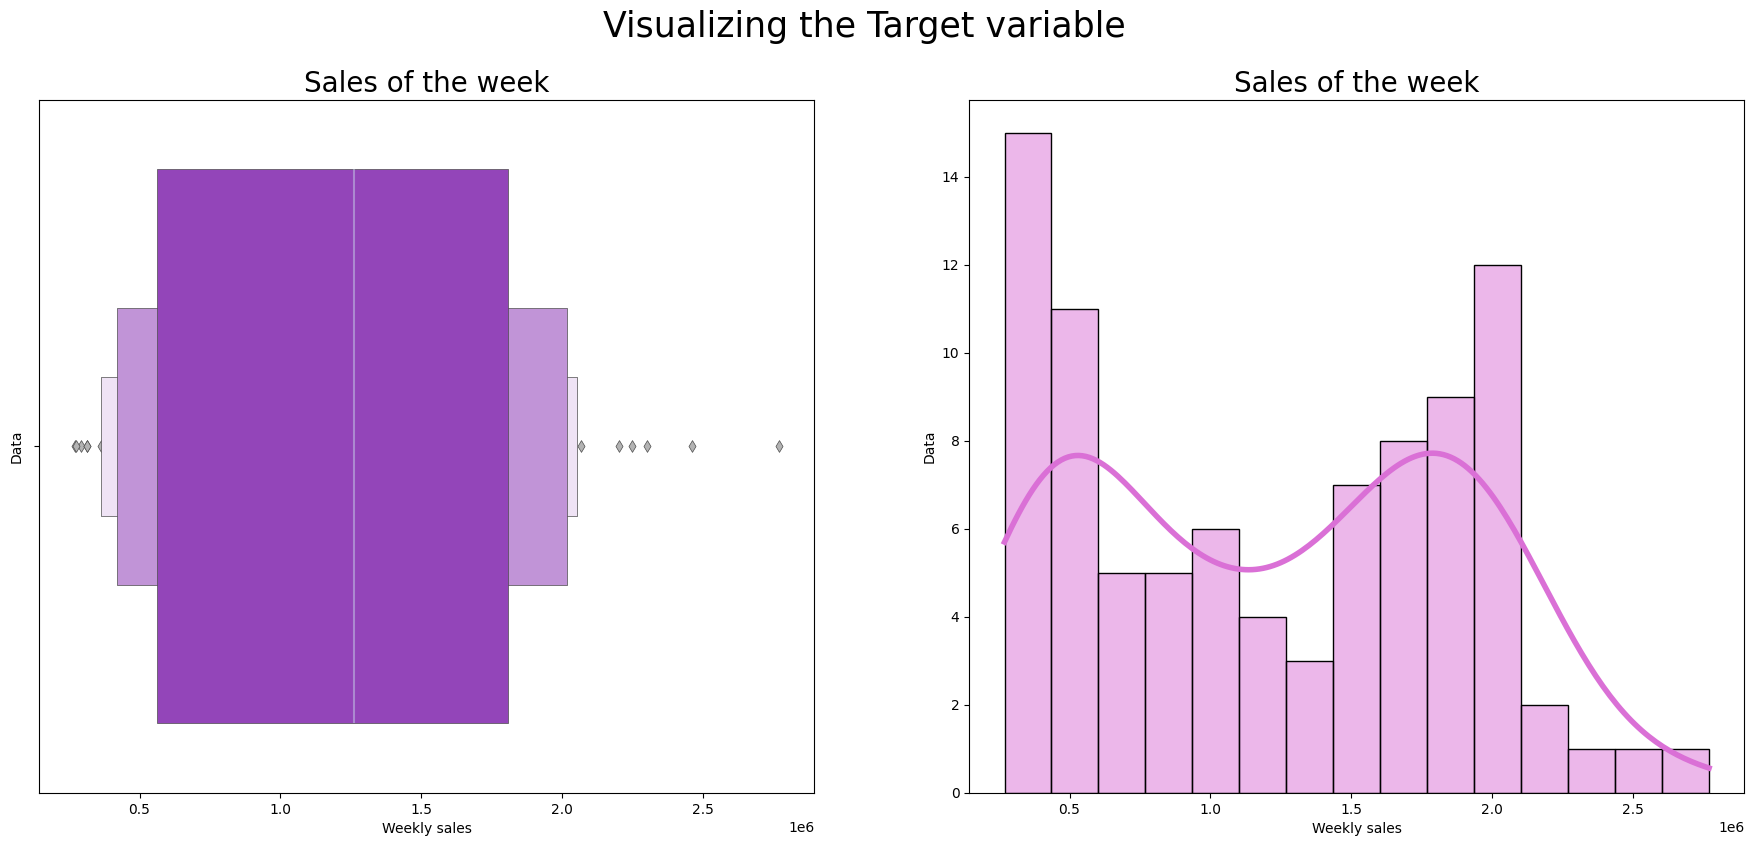

In [10]:
fig, axes = plt.subplots(nrows=1 , ncols=2 , figsize=(22,9))


# Boxen plot : third line of visualization TARGET
# ------------------------------------------------------------------------------------------------------------------------
sns.boxenplot(data=walmart, x='Weekly_Sales', ax=axes[0], color='darkorchid', 
              linewidth=.5,
              line_kws=dict(linewidth=1.5, color="#cde"),
              flier_kws=dict(facecolor=".7", linewidth=.5))
axes[0].set_xlabel('Weekly sales')
axes[0].set_ylabel('Data')
axes[0].set_title('Sales of the week', fontsize = 20)


# Hist plot with Kernel Density : fourth line of visualization TARGET
# ------------------------------------------------------------------------------------------------------------------------
sns.histplot(data=walmart, x='Weekly_Sales', bins=15, ax=axes[1], color='orchid', kde=True, line_kws=dict(linewidth=4))
axes[1].set_xlabel('Weekly sales')
axes[1].set_ylabel('Data')
axes[1].set_title('Sales of the week', fontsize = 20)


# Setting a title and show plot
# ------------------------------------------------------------------------------------------------------------------------
plt.suptitle('Visualizing the Target variable', fontsize=25)
plt.show()


##### ⇢ **Then let's see OTHER NUMERICAL VARIABLES**  👀

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

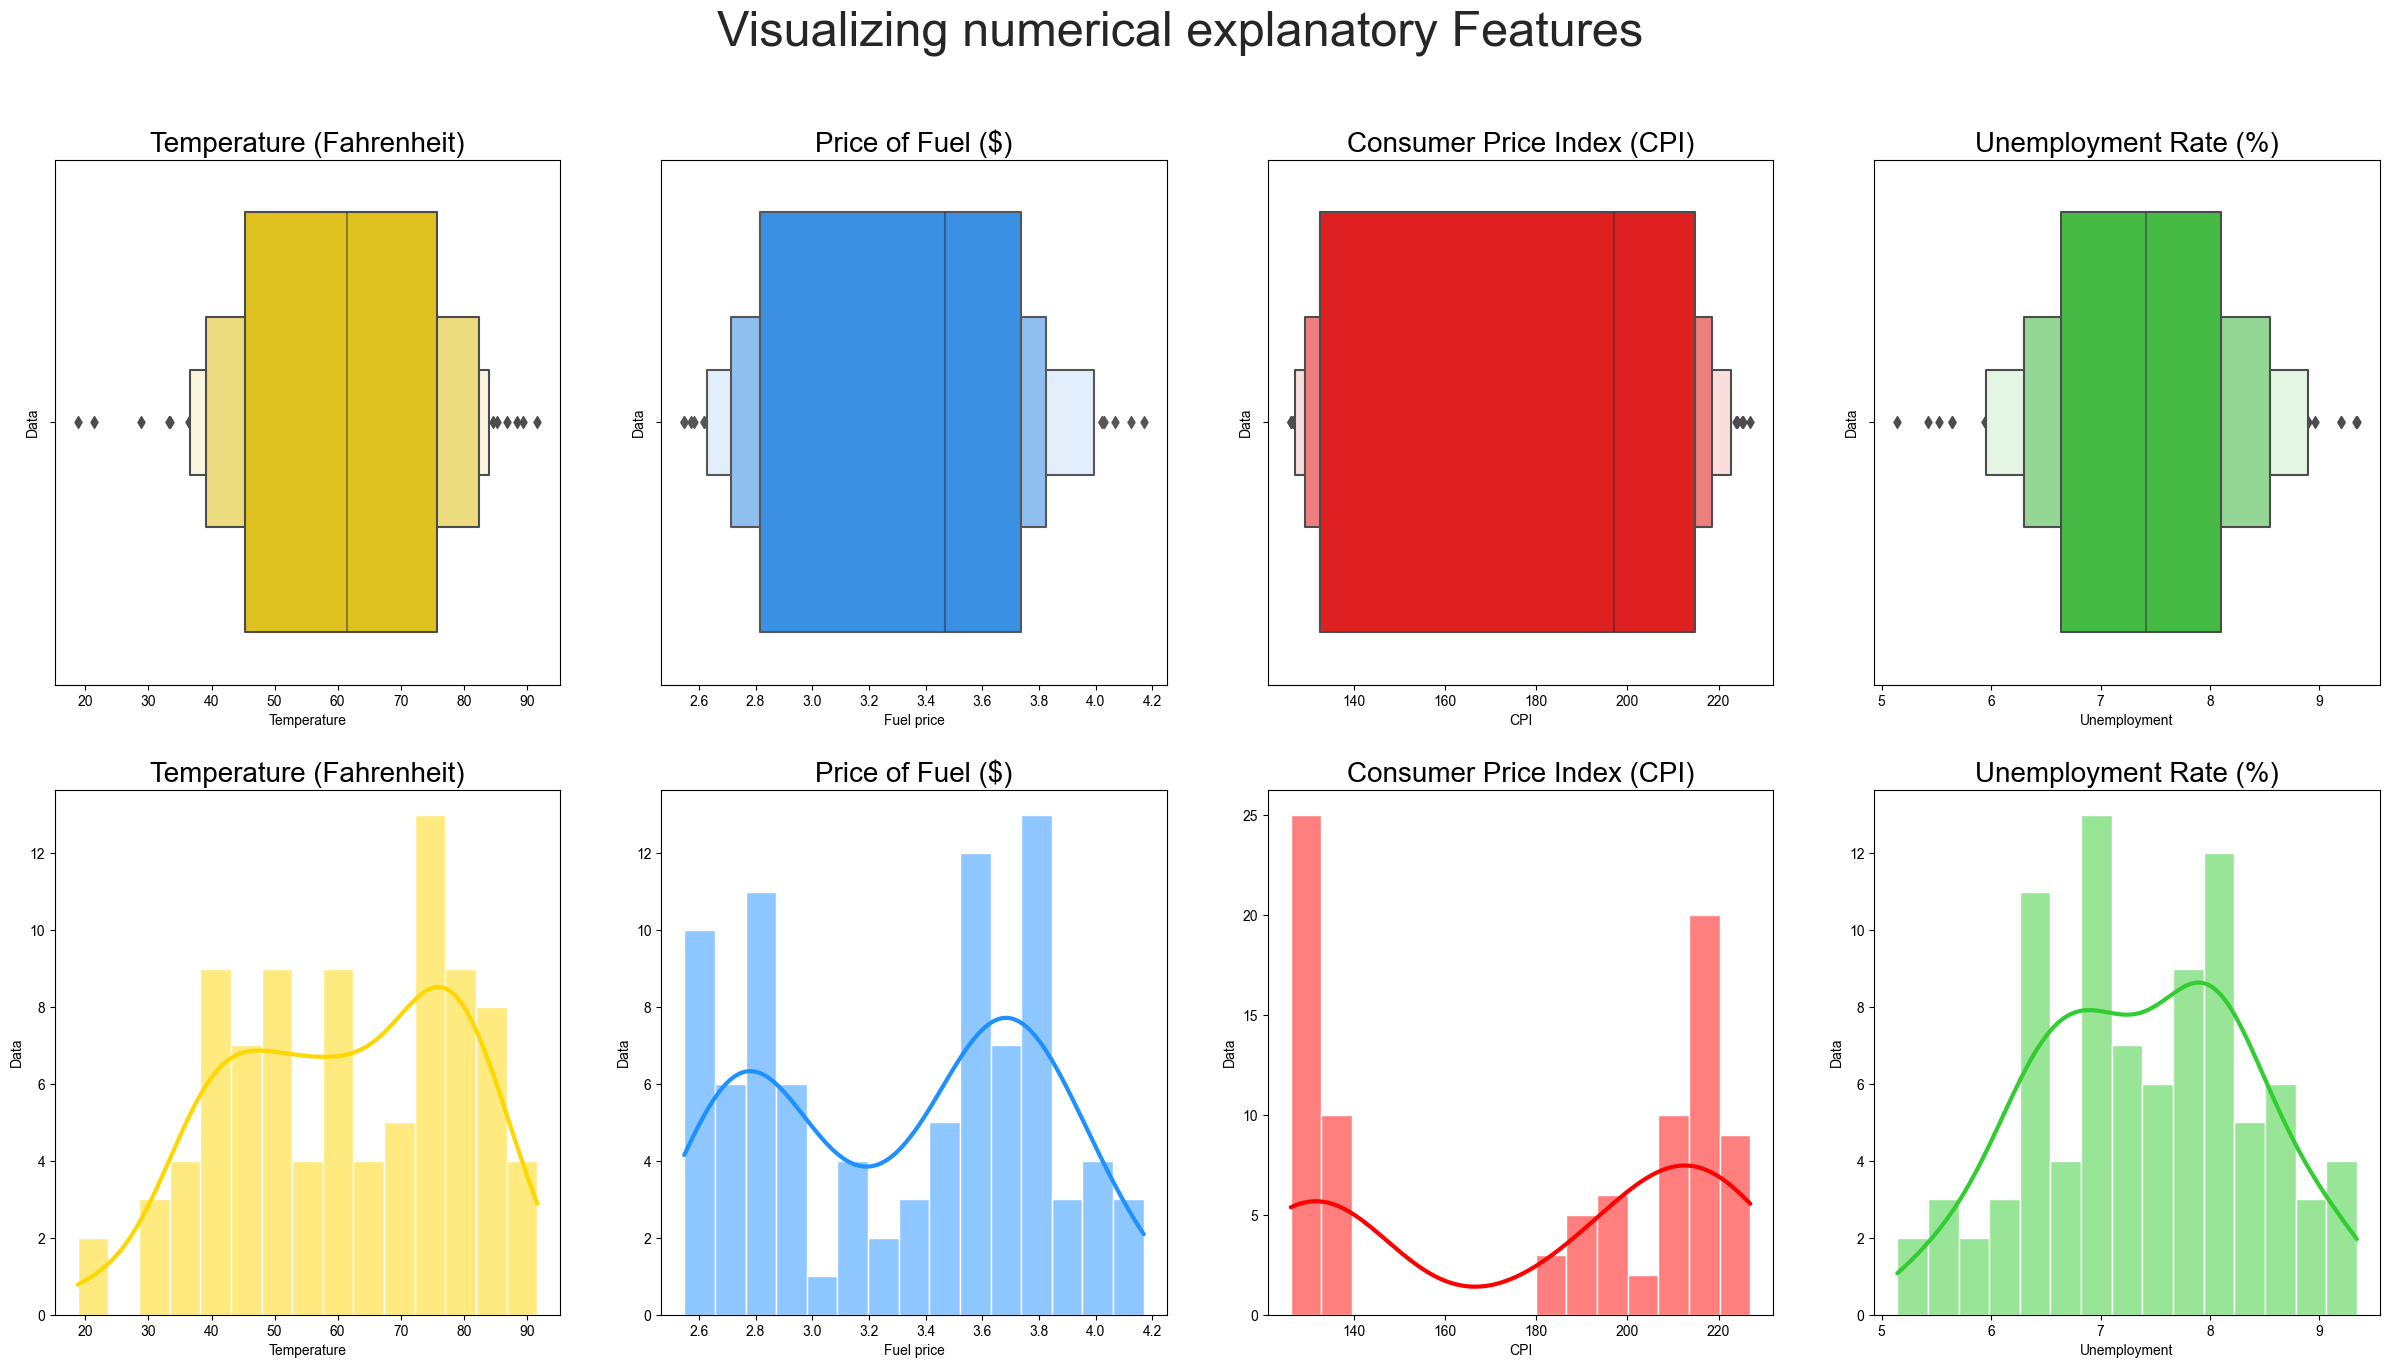

In [11]:
fig, axes = plt.subplots(nrows=2 , ncols=4 , figsize=(30,15))
sns.set_style("darkgrid")


# Boxen plot : first line of visualization 
# -----------------------------------------------------------------------------------------------------------------------------
sns.boxenplot(data=walmart, x='Temp_Fahrenheit', ax=axes[0, 0], color='gold')
axes[0, 0].set_xlabel('Temperature')
axes[0, 0].set_ylabel('Data')
axes[0, 0].set_title('Temperature (Fahrenheit)', fontsize=20)

sns.boxenplot(data=walmart, x='Fuel_Price', ax=axes[0, 1], color='dodgerblue')
axes[0, 1].set_xlabel('Fuel price')
axes[0, 1].set_ylabel('Data')
axes[0, 1].set_title('Price of Fuel ($)', fontsize=20)

sns.boxenplot(data=walmart, x='CPI', ax=axes[0, 2], color='red')
axes[0, 2].set_xlabel('CPI')
axes[0, 2].set_ylabel('Data')
axes[0, 2].set_title('Consumer Price Index (CPI)', fontsize=20)

sns.boxenplot(data=walmart, x='Unemployment',ax=axes[0, 3], color='limegreen')
axes[0, 3].set_xlabel('Unemployment')
axes[0, 3].set_ylabel('Data')
axes[0, 3].set_title('Unemployment Rate (%)', fontsize=20)



# Hist plot with Kernel Density : second line of visualization
# -----------------------------------------------------------------------------------------------------------------------------
sns.histplot(data=walmart, x='Temp_Fahrenheit', ax=axes[1, 0], color='gold', kde=True, bins=15, line_kws=dict(linewidth=3))
axes[1, 0].set_xlabel('Temperature')
axes[1, 0].set_ylabel('Data')
axes[1, 0].set_title('Temperature (Fahrenheit)', fontsize=20)

sns.histplot(data=walmart, x='Fuel_Price', ax=axes[1, 1], color='dodgerblue', kde=True, bins=15, line_kws=dict(linewidth=3))
axes[1, 1].set_xlabel('Fuel price')
axes[1, 1].set_ylabel('Data')
axes[1, 1].set_title('Price of Fuel ($)', fontsize=20)

sns.histplot(data=walmart, x='CPI', ax=axes[1, 2], color='red', kde=True, bins=15, line_kws=dict(linewidth=3))
axes[1, 2].set_xlabel('CPI')
axes[1, 2].set_ylabel('Data')
axes[1, 2].set_title('Consumer Price Index (CPI)', fontsize=20)

sns.histplot(data=walmart, x='Unemployment',ax=axes[1, 3], color='limegreen', kde=True, bins=15, line_kws=dict(linewidth=3))
axes[1, 3].set_xlabel('Unemployment')
axes[1, 3].set_ylabel('Data')
axes[1, 3].set_title('Unemployment Rate (%)', fontsize=20)


# Title and show plots
# -----------------------------------------------------------------------------------------------------------------------------
plt.suptitle('Visualizing numerical explanatory Features', fontsize=35)
plt.show()

#### **INTERPRETATION** :
* We can observe that both Fuel_Price and CPI have a bimodal distribution 
* Temperature and Unemployed Rate seem to follow a normal distribution 

#### ⇢ **Right now let's see others NUMERICAL VARIABLES (dates)** : 👀

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

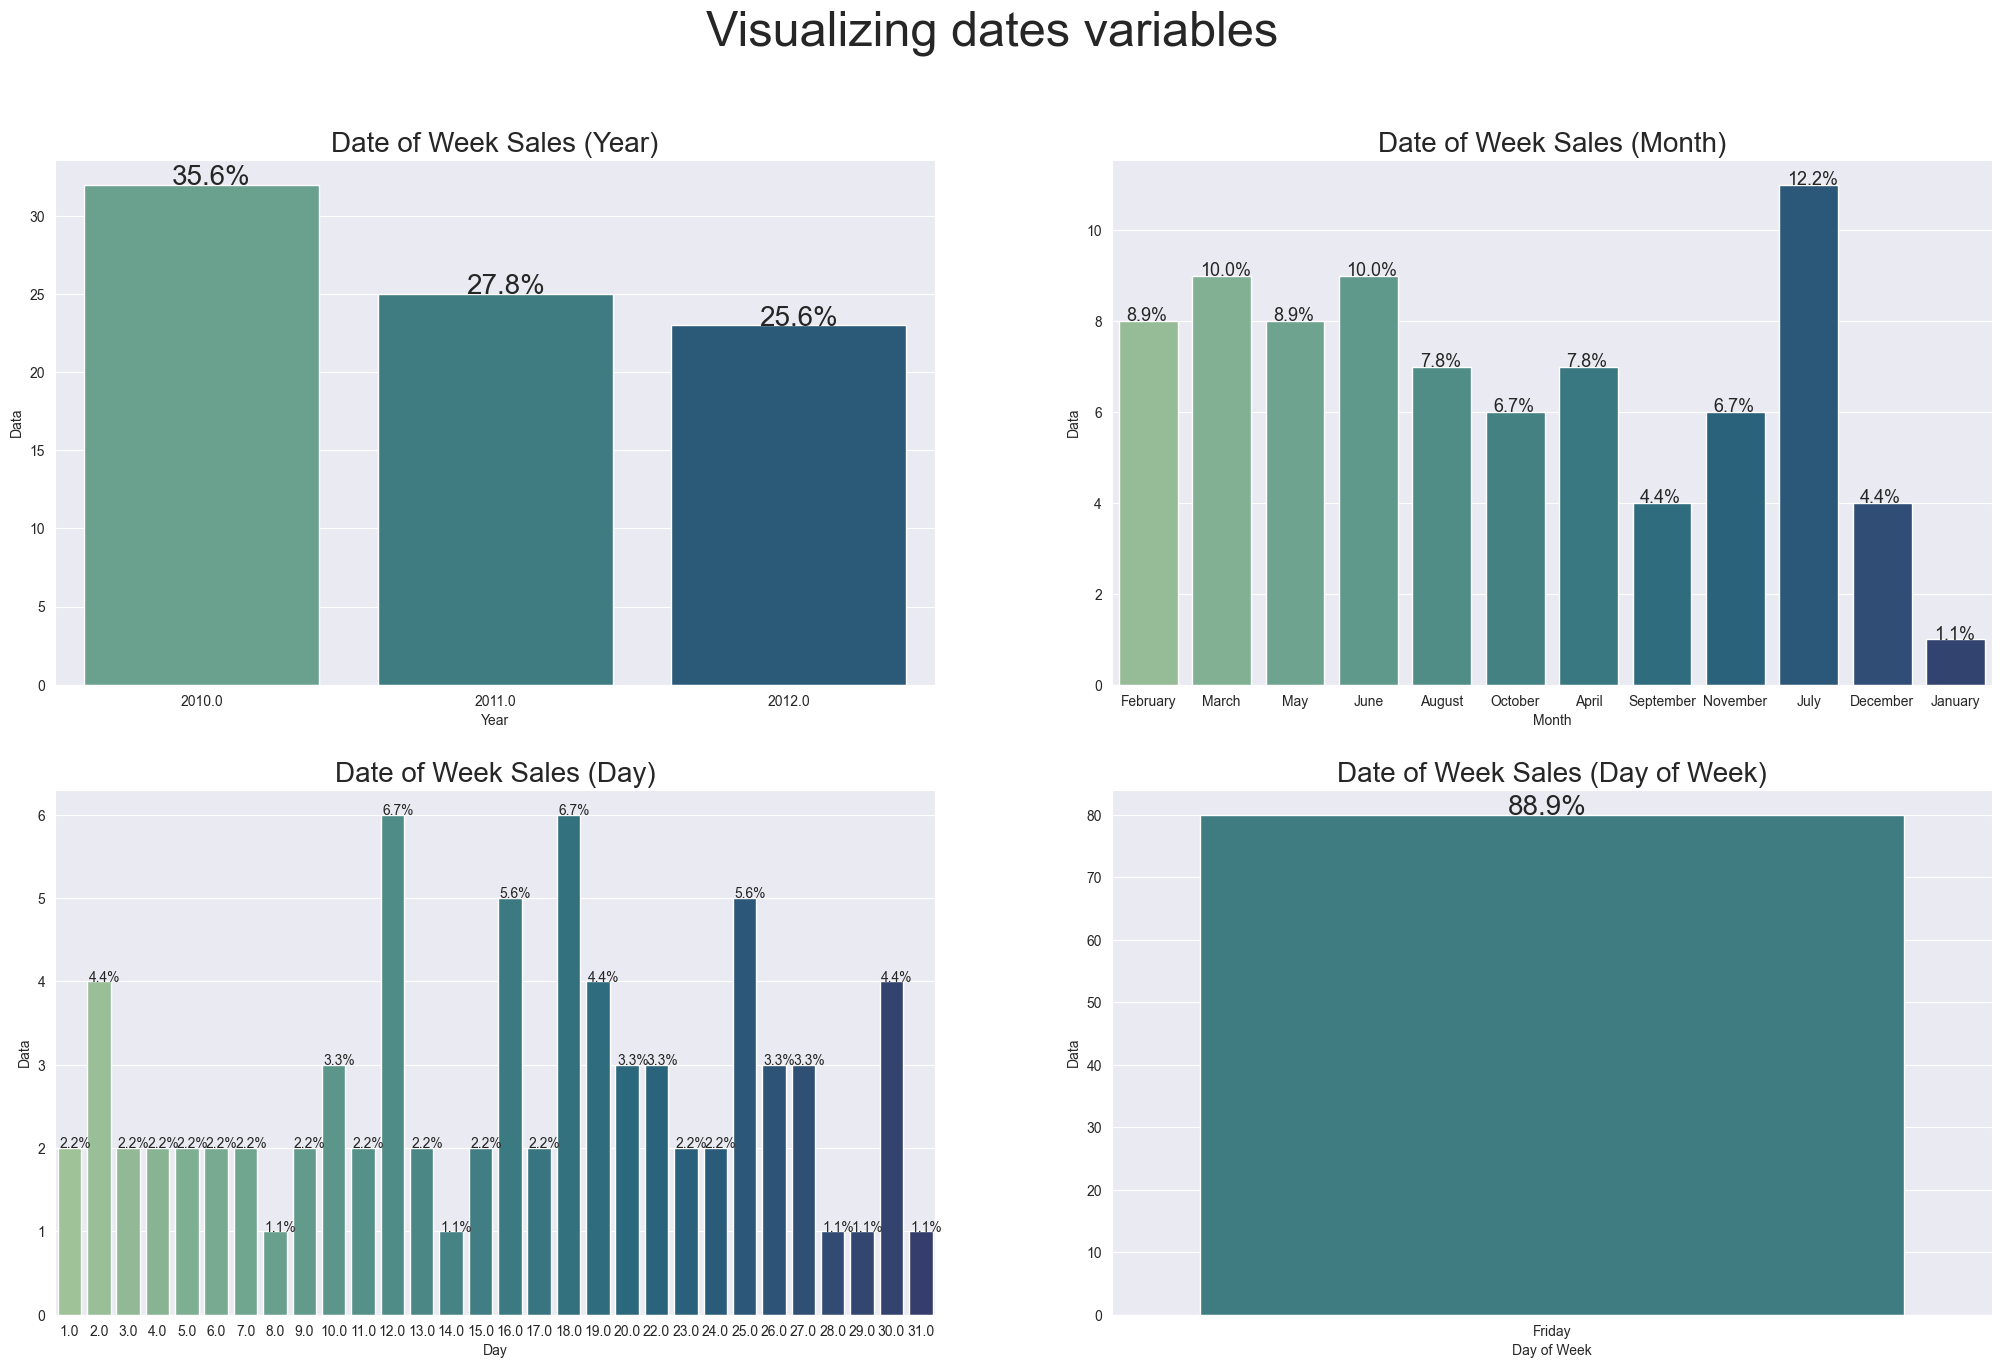

In [12]:
fig, axes = plt.subplots(nrows=2 , ncols=2 , figsize=(25,15))


# YEAR PLOT with percentages
# ----------------------------------------------------------------------------------------------------------
sns.countplot(data=walmart, x='Year', ax=axes[0, 0], palette="crest") # bins : 2 years represented 
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Data')
axes[0, 0].set_title('Date of Week Sales (Year)', fontsize = 20)

for i in axes[0, 0].patches:
    operation = round(i.get_height()/len(walmart)*100, 1)
    text = str(operation) + '%'
    text_x = i.get_x()+0.30 
    text_y = i.get_height()
    axes[0, 0].text(text_x, text_y, text, size=20)


# MONTH PLOT with percentages
# -----------------------------------------------------------------------------------------------------------------------------
sns.countplot(data=walmart, x='Month_Cat', ax=axes[0 ,1], palette="crest") # bins : 12 months in a year
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Data')
axes[0, 1].set_title('Date of Week Sales (Month)', fontsize = 20)

for i in axes[0, 1].patches:
    operation = round(i.get_height()/len(walmart)*100, 1)
    text = str(operation) + '%'
    text_x = i.get_x()+0.1 
    text_y = i.get_height()
    axes[0, 1].text(text_x, text_y, text, size=13)


# DAY PLOT with percentages
# -----------------------------------------------------------------------------------------------------------------------------
sns.countplot(data=walmart, x='Day_Num', ax=axes[1, 0], palette="crest") # bins : max 31 days in a month
axes[1, 0].set_xlabel('Day')
axes[1, 0].set_ylabel('Data')
axes[1, 0].set_title('Date of Week Sales (Day)', fontsize = 20)

for i in axes[1, 0].patches:
    operation = round(i.get_height()/len(walmart)*100, 1)
    text = str(operation) + '%'
    text_x = i.get_x()+0.05
    text_y = i.get_height()
    axes[1, 0].text(text_x, text_y, text, size=10)


# DAY OF THE WEEK with percentages
# -----------------------------------------------------------------------------------------------------------------------------
sns.countplot(data=walmart, x='Day_Cat', ax=axes[1, 1], palette="crest") # bins : 7 days in a week
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Data')
axes[1, 1].set_title('Date of Week Sales (Day of Week)', fontsize = 20)

for i in axes[1, 1].patches:
    operation = round(i.get_height()/len(walmart)*100, 1)
    text = str(operation) + '%'
    text_x = i.get_x()+0.35
    text_y = i.get_height()
    axes[1, 1].text(text_x, text_y, text, size=20)
    

# Title and show plots
# -----------------------------------------------------------------------------------------------------------------------------
plt.suptitle('Visualizing dates variables', fontsize=35)
plt.show()

##### **INTERPRETATIONS** : 
* **Week sales from the Walmart dataset represent 2 years of sales** : 
    - 2010 : people bought more this period than the other
    - 2011-2012 : people bought less, could be linked to the contextual economical crisis that started in 2010 
    
    	〰
        
* **People tend to buy more in the middle or at the end of the month**  : 
    - Certainly because they received their Salary 
    - They also seem to buy more at the wend of the week 
        
    	〰
        


* **Best months of the year of sales**  : 
    - May, June, July are best periods for Walmart : sales are linked to temperature? 
    - November and Decembre sales aren't as high as summer period but we can notice raise : Christmas period 
    - Febuary, March : special offer from winter? Probaly linked 
        
    	〰
        


* **Best day of the week for sales**  : 
    - Friday is the winner !!!
    - It's the end of the week, you a had a rough week... And you accidentally finish in front of your favorite shop, and ohhh... You can't resist and you buy this cute pull over 
    - Well, friday being the best day of the week makes sens (if you recognize yourself in the previous sentence)





 ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

### __________________________ 🔠 **CATEGORICAL VARIABLES** 🔠 __________________________

#### ⇢ **Right now let's see our CATEGORICAL variables** : 👀

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

<Axes: xlabel='Holiday_or_Not', ylabel='count'>

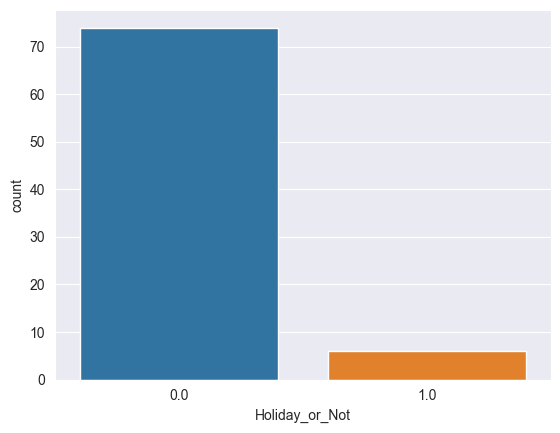

In [13]:
# Holiday period or not plotted 
# -----------------------------------------------------------------------------------------------------------------------------
sns.countplot(walmart, x = 'Holiday_or_Not')

Text(0.5, 0.98, 'Store Variable (count)')

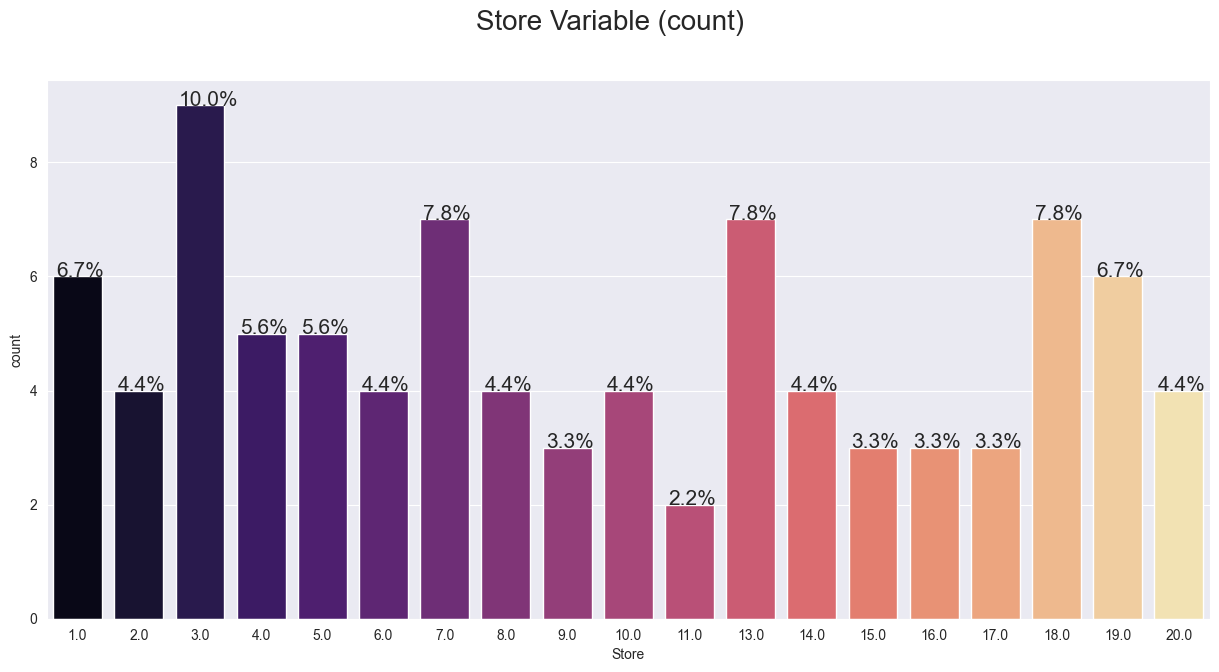

In [14]:
# Stores plot : how many time each store appears in the dataset and its percentage associated 
# -----------------------------------------------------------------------------------------------------------------------------
plt.figure(figsize=(15, 7))
g = sns.countplot(walmart, x='Store', palette='magma')

for i in g.patches:
    operation = round(i.get_height()/len(walmart)*100, 1)
    text = str(operation) + '%'
    text_x = i.get_x() +0.05
    text_y = i.get_height()
    g.text(text_x, text_y, text, size=15)

plt.suptitle('Store Variable (count)', fontsize=20)

##  _____ 👉 **BIVARIATE ANALYSIS** : Let's  explore **variables in relation with others** : _____

### __________________________ 🔢 **NUMERICAL VARIABLES** 🔢 __________________________

* With this pairplot we are trying to understand **relationships** between those numerical variables : 
    - 'Weekly_Sales', 'Temp_Fahrenheit', 'Fuel_Price', 'CPI','Unemployment'

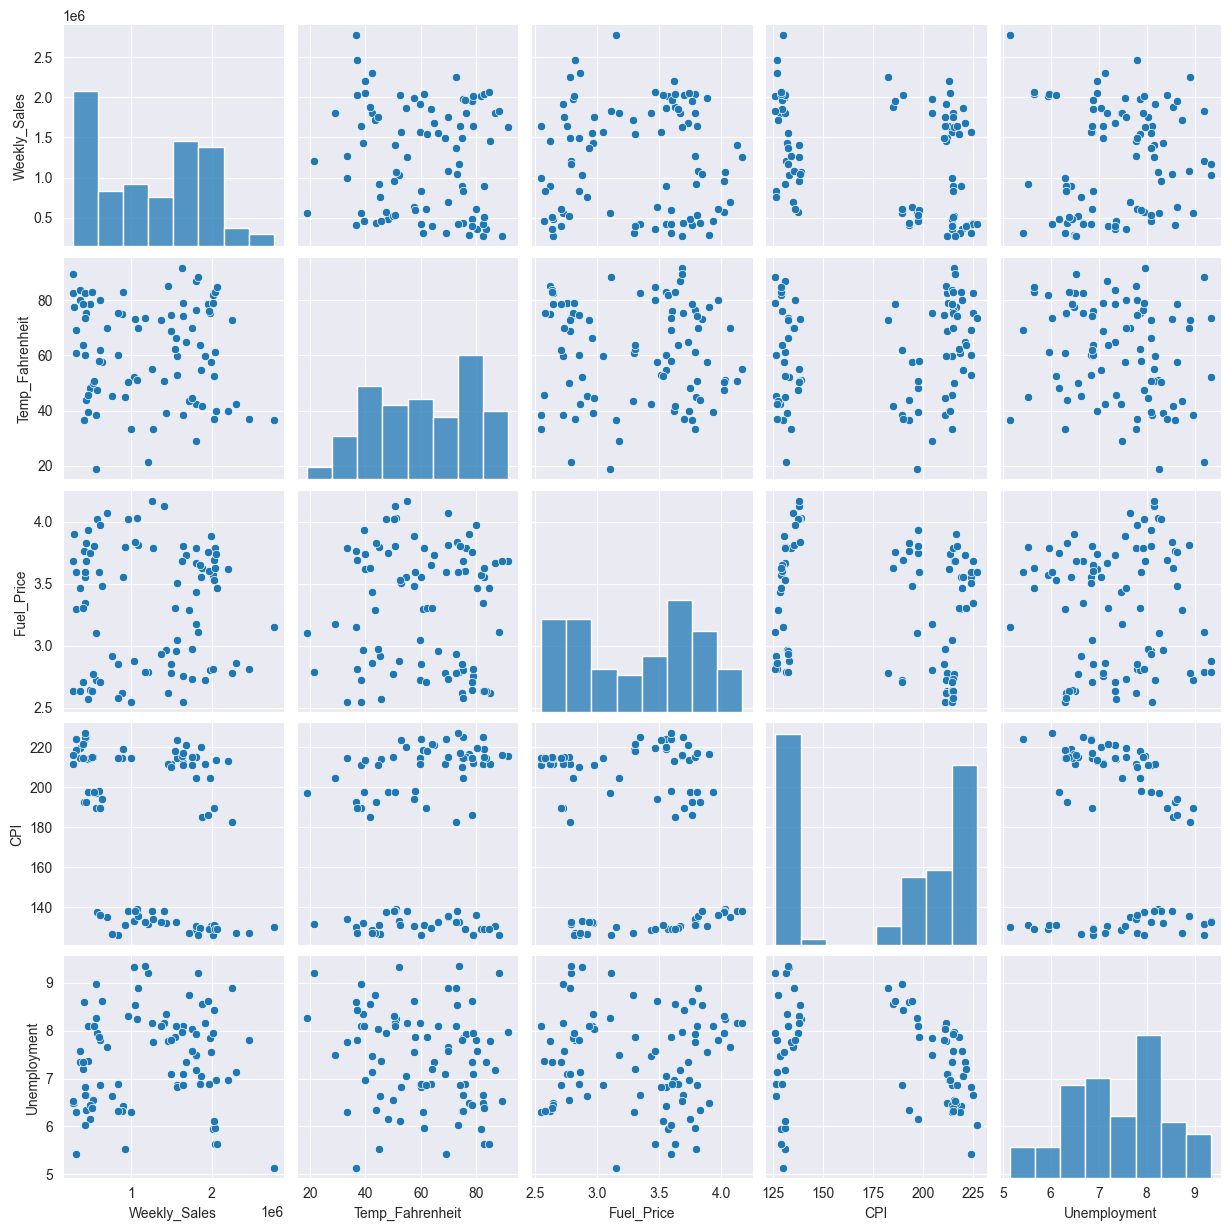

In [15]:
# Pairplot of numerical variables 
# -----------------------------------------------------
filter = walmart[['Weekly_Sales', 'Temp_Fahrenheit',
       'Fuel_Price', 'CPI','Unemployment']]

sns.pairplot(filter, diag_kind='hist', dropna=True,)

* With this Scatter Matrix we are trying to understand **relationships** between all variables : 

In [16]:
# Scatter matrix all variables included 
# -----------------------------------------------------------------------------------------------------------------------------
fig = px.scatter_matrix(walmart)

fig.update_layout(
        title = go.layout.Title(text = "Bivariate analysis", x = 0.5), showlegend = False, 
            autosize=False, height=1500, width = 1500)
            
fig.show()

In [17]:
# Correlation matrix with filtered variables 
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------
filter2 = walmart[['Store', 'Weekly_Sales', 'Holiday_or_Not', 'Temp_Fahrenheit',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month_Num',
       'Day_Num']]

walmartcorr_matrix = filter2.corr().round(2)

fig = ff.create_annotated_heatmap(walmartcorr_matrix.values, x = walmartcorr_matrix.columns.tolist(), y = walmartcorr_matrix.index.tolist(), colorscale='dense')
fig.update_layout(title = 'Heatmap', height = 700, width=700)

fig.show()

### **INTERPRETATION Pairplots and Heatmap** :

* CPI is the most correlated variable with Weekly_Sales. Then come Day_of_week and Store, then come Temperature and Unemployment. Holiday_Flag does not seem correlated at all, which is surprising, but it could also have a non linear correlation. We also observe that there might be multicolinearity between exaplanative variables. Indeed, Fuel_Price / Year have a strong correlation (0.85!!), CPI / Store and Month / Holiday_Flag have a strong anti-correlation. We might have to remove some of those variables or proceed with a PCA (Principal Component Analysis) to handle this problem better.

* **We can observe there is a correlation between Explanatory variables** : 
    - Fuel_Price and Year (0.85 )
    - Store and Unemployment (0.29)
    - Temperature and Month (0.25)
    - CPI and Day (0.24)
    -
        
        

* **Correlation with our target:** 
    - Store (0.14)
    - Unemployment (0.9)
    - CPI (0.37 negatively)
    - No relationship at all with Holiday Period (don't mean they are not linked in an other manner)


 ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

###  _____ 👉 **OTHER RELATIONSHIP WITH TARGET** : Let's see **variables in relation with "Weekly Sales"** : _____

##### ➡️ **Which Store does more weekly Sales?**
    - Top 5 Stores with hightest weekly sales (respectively) :
        - 4, 13, 14, 20, 10

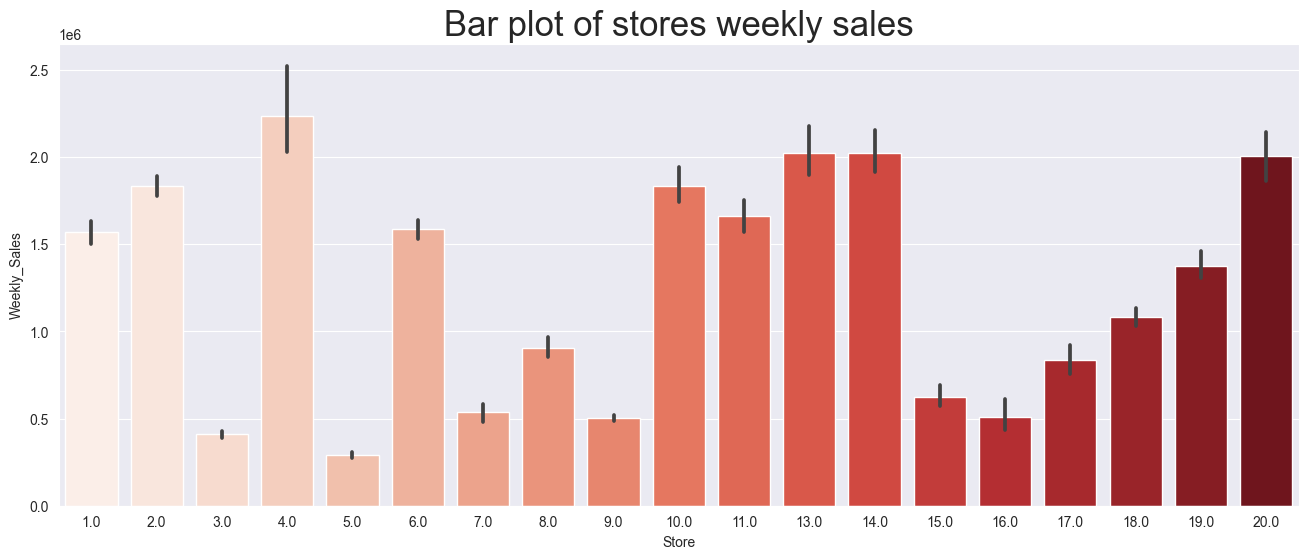

In [18]:
# Weekly sales regrouped by Stores : to see which stores have the best performances 
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.figure(figsize = (16, 6))

plot = sns.barplot(walmart, 
                   x = 'Store', 
                   y = 'Weekly_Sales',
                   palette='Reds')

plot.set_title("Bar plot of stores weekly sales", fontsize=25)
plt.show()

*****

## 🔷 **PART 2️⃣** : Preprocessing and Baseline model (linear regression) : 🚀 

------

#### ➡️ **Explanatory variables (X)** 📊

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

-  I need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

    * **Categorical variables** : Store, Holiday_Flag
    * **Numerical variables** : Temp_Fahrenheit, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek 
    * **Exclusion** : Temp_Celcius is excluding as it is not originally from the dataset and has been added for fun 

* Let's try with all thoses numericals variables, **knowing that the 4 dates ('Year, Month, Day, DayOfWeek) could bring some issues** because they are not typically numerical / overfitting is expected 

* I will try de **play on different features** to catch only thoses with **best coefficients** 

* I DID WITHOUT DATES because : **I did forward selecting explanatory variables** and it turned out Dates are decreasing performances of the model 

* Finally, after testing dates variables included, **only thoses explanatory will be kept** :
    - feature_list = ['Store', 'Holiday_or_Not', 'Temp_Fahrenheit', 
                'Fuel_Price', 'CPI', 'Unemployment']

    - Dates variables : were considerably reducing the model's performances (lowering the R2 score on test --> inducing more Variance and overfitting)



#### ➡️ **Separation of X and Y** 🌻

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

In [19]:
walmart.columns

Index(['Store', 'Weekly_Sales', 'Holiday_or_Not', 'Temp_Fahrenheit',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month_Num', 'Month_Cat',
       'Day_Num', 'Day_Cat', 'Day_of_Week', 'Temp_Celcius'],
      dtype='object')

In [20]:
print('*************************************')
print('- Separating labels from features...-')
print('*************************************')
print()

feature_list = ['Store', 'Holiday_or_Not', 'Temp_Fahrenheit', 
                'Fuel_Price', 'CPI', 'Unemployment']

target_variable = ['Weekly_Sales']

X = walmart.loc[:, feature_list]

Y = walmart.loc[:, target_variable]

print('-------------------------------------')
print('Here is the target variable Y :')
print()
print(Y.head())

print()
print()

print('-------------------------------------')
print('Here are the explanatory variables X :')
print()
display(X.head())


print()
print()
print('*************************************')
print('----------- ... Done. ---------------')
print('*************************************')

*************************************
- Separating labels from features...-
*************************************

-------------------------------------
Here is the target variable Y :

   Weekly_Sales
0    1572117.54
1    1807545.43
4    1644470.66
6     695396.19
7    2203523.20


-------------------------------------
Here are the explanatory variables X :



,Store,Holiday_or_Not,Temp_Fahrenheit,Fuel_Price,CPI,Unemployment
0,6.0,NaN,59.61,3.045,214.777523,6.858
1,13.0,0.0,42.38,3.435,128.616064,7.470
4,6.0,0.0,78.89,2.759,212.412888,7.092
6,15.0,0.0,69.80,4.069,134.855161,7.658
7,20.0,0.0,39.93,3.617,213.023622,6.961




*************************************
----------- ... Done. ---------------
*************************************


#### ➡️ **Train Test split** on the Walmart Dataset ✂️

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

In [21]:
print('*************************************')
print('- Split into train and test set ...-')
print('*************************************')

print()
print()
print('                    .')
print('                    .')
print('                    .')
print('                    .')
print('                    .')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=23)


print()
print()

print('*************************************')
print('----------- ... Done. ---------------')
print('*************************************')

*************************************
- Split into train and test set ...-
*************************************


                    .
                    .
                    .
                    .
                    .


*************************************
----------- ... Done. ---------------
*************************************


#### ➡️ **Pipeline** with scikit-learn : 🔩

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

In [22]:
print('***********************************************')
print('------------- P I P E L I N E ... -------------')
print('***********************************************')

print()
print()
print()

print(' //////////// NUMERICAL Pipeline ////////////')
print()

numerical_features = ['Temp_Fahrenheit', 'Fuel_Price', 'CPI', 'Unemployment']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

print('                    .')
print('                    .')
print('                    .')
print()
print()

print(' //////////// CATEGORICAL Pipeline ////////////')
print()

categorical_features = ['Store', 'Holiday_or_Not']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

print()
print()
print('                    .')
print('                    .')
print('                    .')
print()

print(' ----------- T r a n s f o r m e r -----------')
print()

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

print()
print('                    .')
print('                    .')
print('                    .')
print()
print()
print()

print('***********************************************')
print('---------------- ... D o n e . ----------------')
print('***********************************************')

***********************************************
------------- P I P E L I N E ... -------------
***********************************************



 //////////// NUMERICAL Pipeline ////////////

                    .
                    .
                    .


 //////////// CATEGORICAL Pipeline ////////////



                    .
                    .
                    .

 ----------- T r a n s f o r m e r -----------


                    .
                    .
                    .



***********************************************
---------------- ... D o n e . ----------------
***********************************************


### 

#### ➡️ **Preprocessing** with scikit-learn : 🌷

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

In [23]:
print('***********************************************')
print('-------- P R E P R O C E S S I N G ... --------')
print('***********************************************')

print()
print()
print()

print(' /////////// Preprocessing X_TRAIN ///////////')
print()
print()

print('------- X_train before preprocessing : -------')
print()
display(X_train.head())
print()

print('------- X_train after preprocessing : --------')
print()

X_train = preprocessor.fit_transform(X_train)
print(X_train[0:5])

print()
print()
print('+++++++++++++++++++++++++++++++++++++++++++++++')
print()
print()

print()
print(' /////////// Preprocessing X_TEST ///////////')
print()
print()

print('------- X_test before preprocessing : -------')
print()
display(X_test.head())
print()

print('------- X_test after preprocessing : --------')
print()

X_test = preprocessor.transform(X_test)
print(X_test[0:5])

print()
print()
print()

print('***********************************************')
print('---------------- ... D o n e . ----------------')
print('***********************************************')

***********************************************
-------- P R E P R O C E S S I N G ... --------
***********************************************



 /////////// Preprocessing X_TRAIN ///////////


------- X_train before preprocessing : -------



,Store,Holiday_or_Not,Temp_Fahrenheit,Fuel_Price,CPI,Unemployment
9,3.0,0.0,60.12,3.555,224.132020,6.833
103,4.0,0.0,42.40,2.860,126.793400,7.127
129,18.0,0.0,73.25,3.840,138.185710,8.535
11,18.0,0.0,52.02,2.878,132.763355,9.331
76,15.0,0.0,47.42,4.021,137.584387,7.943



------- X_train after preprocessing : --------

  (0, 0)	-0.04293322252167937
  (0, 1)	0.5695398728732898
  (0, 2)	1.2245767744081857
  (0, 3)	-0.5697644030101267
  (0, 5)	1.0
  (1, 0)	-1.0115613855996577
  (1, 1)	-0.9165262048501128
  (1, 2)	-1.2334932327197325
  (1, 3)	-0.2688994621834638
  (1, 6)	1.0
  (2, 0)	0.6747918215648815
  (2, 1)	1.178933875968497
  (2, 2)	-0.9458058295672
  (2, 3)	1.171977533340129
  (2, 19)	1.0
  (3, 0)	-0.48570343250653375
  (3, 1)	-0.8780381625493623
  (3, 2)	-1.0827353233424972
  (3, 3)	1.986564243877615
  (3, 19)	1.0
  (4, 0)	-0.7371531813868216
  (4, 1)	1.565952523548261
  (4, 2)	-0.9609908922811228
  (4, 3)	0.5661542511313445
  (4, 16)	1.0


+++++++++++++++++++++++++++++++++++++++++++++++



 /////////// Preprocessing X_TEST ///////////


------- X_test before preprocessing : -------



,Store,Holiday_or_Not,Temp_Fahrenheit,Fuel_Price,CPI,Unemployment
40,18.0,0.0,50.43,4.023,137.978133,8.304
67,3.0,0.0,45.71,2.572,214.424881,7.368
87,3.0,0.0,75.19,3.688,225.235150,6.664
6,15.0,0.0,69.80,4.069,134.855161,7.658
114,11.0,1.0,69.90,2.735,215.061403,7.564



------- X_test after preprocessing : --------

  (0, 0)	-0.5726175848368943
  (0, 1)	1.5702289726927883
  (0, 2)	-0.9510477091372183
  (0, 3)	0.9355836512620395
  (0, 19)	1.0
  (1, 0)	-0.8306268923836244
  (1, 1)	-1.532334881662112
  (1, 2)	0.9794446108536385
  (1, 3)	-0.02227207871671528
  (1, 5)	1.0
  (2, 0)	0.7808380200056985
  (2, 1)	0.8539237409843868
  (2, 2)	1.2524338575713512
  (2, 3)	-0.7427105764785112
  (2, 5)	1.0
  (3, 0)	0.48620450990466546
  (3, 1)	1.6685873030169276
  (3, 2)	-1.02991141004223
  (3, 3)	0.27449946155447963
  (3, 16)	1.0
  (4, 0)	0.49167080879336783
  (4, 1)	-1.1838042763830987
  (4, 2)	0.9955185383249293
  (4, 3)	0.17830454850105934
  (4, 13)	1.0
  (4, 22)	1.0



***********************************************
---------------- ... D o n e . ----------------
***********************************************


#### ➡️ **Training of our Model** : 🥊

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

To begin with, I use a **very basic Linear Regression model**, without any tuning of hyperparameters 📎

In [24]:
regressor = LinearRegression()

In [25]:
print("******* Training our model ... ******")
print('-------------------------------------')
print()

regressor.fit(X_train,Y_train)

print('                 .')
print('                 .')
print('                 .')

print()
print('-------------------------------------')
print("************* ...Done. *************")


******* Training our model ... ******
-------------------------------------

                 .
                 .
                 .

-------------------------------------
************* ...Done. *************


#### ➡️ **Performance assessment** : 📈

In [26]:
print("*** Predictions on the training set ... ***")
print('-------------------------------------------')
print()

Y_train_pred = regressor.predict(X_train)
print(Y_train_pred[:5])

print()
print('------------------------------------------')
print("**************** ...Done. ****************")

*** Predictions on the training set ... ***
-------------------------------------------

[[ 438705.90122205]
 [2318731.78196202]
 [1069772.24362018]
 [1139741.07239841]
 [ 622759.93267044]]

------------------------------------------
**************** ...Done. ****************


In [27]:
print("***** Predictions on the test set ... *****")
print('-------------------------------------------')
print()

Y_test_pred = regressor.predict(X_test)
print(Y_test_pred[:5])

print()
print('------------------------------------------')
print("**************** ...Done. ****************")

***** Predictions on the test set ... *****
-------------------------------------------

[[1070548.31683661]
 [ 422232.11025144]
 [ 421348.37689194]
 [ 534984.44973898]
 [1431232.21161427]]

------------------------------------------
**************** ...Done. ****************


#### ➡️ **R2 Scores** : 📈

In [28]:
print("************** S c o r e s ... *************")
print('-------------------------------------------')
print()
print()

print('------- R2 score on the training set -------')
print()
print(r2_score(Y_train, Y_train_pred))
print()
print()

print('--------- R2 score on the test set ---------')
print()
print(r2_score(Y_test, Y_test_pred))

print()
print()
print('------------------------------------------')
print("**************** ...Done. *****************")

************** S c o r e s ... *************
-------------------------------------------


------- R2 score on the training set -------

0.9768816466775677


--------- R2 score on the test set ---------

0.9572584747991985


------------------------------------------
**************** ...Done. *****************


#### ➡️ **Coefficients** : ✅

In [29]:
# Expose the coefficients of the model 
# ---------------------------------------------------------------------------------------------------------------------------
regressor.coef_

array([[  -25431.03062822,   -86521.66516947,   822578.66790116,
          -30544.47935823,   285748.38550142, -1276605.23587842,
         2481356.23582824, -1275053.66564559,    17276.54981896,
         -572923.26226577,  -768521.20780688, -1185616.21195049,
         2144686.3411157 ,  -159779.74100635,  2257830.76118857,
         1075284.76355572,   808502.73202286,  -609520.43108747,
         1020866.13390401,  1263950.40982672,  1528807.15692823,
          529456.25084224,   -51138.11303721]])

In [30]:
# Build a loop to associate columns names with corresponding coefficients 
# ---------------------------------------------------------------------------------------------------------------------------
column_names = []
for name, pipeline, features_list in preprocessor.transformers_: 
    if name == 'num': 
        features = features_list 
    else: 
        features = pipeline.named_steps['encoder'].get_feature_names_out() 
    column_names.extend(features) 
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['Temp_Fahrenheit', 'Fuel_Price', 'CPI', 'Unemployment', 'x0_2.0', 'x0_3.0', 'x0_4.0', 'x0_5.0', 'x0_6.0', 'x0_7.0', 'x0_8.0', 'x0_9.0', 'x0_10.0', 'x0_11.0', 'x0_13.0', 'x0_14.0', 'x0_15.0', 'x0_16.0', 'x0_17.0', 'x0_18.0', 'x0_19.0', 'x0_20.0', 'x1_1.0']


In [31]:
walmart_coefs = pd.DataFrame(index = column_names, data = regressor.coef_.transpose(), columns=["Walmart Coefficients"])
walmart_coefs

,Walmart Coefficients
Temp_Fahrenheit,-2.543103e+04
Fuel_Price,-8.652167e+04
CPI,8.225787e+05
Unemployment,-3.054448e+04
x0_2.0,2.857484e+05
x0_3.0,-1.276605e+06
x0_4.0,2.481356e+06
x0_5.0,-1.275054e+06
x0_6.0,1.727655e+04
x0_7.0,-5.729233e+05


In [32]:
# Taking absolutes values nad sorting them by descending order
# ---------------------------------------------------------------------------------------------------------------------------
walmart_feature_importance = abs(walmart_coefs).sort_values(by = 'Walmart Coefficients', ascending=False)
walmart_feature_importance.head()

,Walmart Coefficients
x0_4.0,2.481356e+06
x0_13.0,2.257831e+06
x0_10.0,2.144686e+06
x0_19.0,1.528807e+06
x0_3.0,1.276605e+06


In [33]:
# Renaming coefficient to make it more easy to interpret
# ---------------------------------------------------------------------------------------------------------------------------
walmart_coefs.index = ["Store " + str(int(float(n.split('_')[1]))) if n.startswith('x') else n for n in walmart_coefs.index]

walmart_feature_importance = abs(walmart_coefs).sort_values(by='Walmart Coefficients', ascending=True)
walmart_feature_importance.head()

,Walmart Coefficients
Store 6,17276.549819
Temp_Fahrenheit,25431.030628
Unemployment,30544.479358
Store 1,51138.113037
Fuel_Price,86521.665169


In [34]:
# Visualizing features importances with a plotly horizontal graph 
# ---------------------------------------------------------------------------------------------------------------------------
fig = px.bar(walmart_feature_importance, orientation = 'h')
fig.update_layout(title="Features importance", showlegend=False, margin = {'l': 120}, autosize=False, 
                  width=900, height=600) 
fig.show()

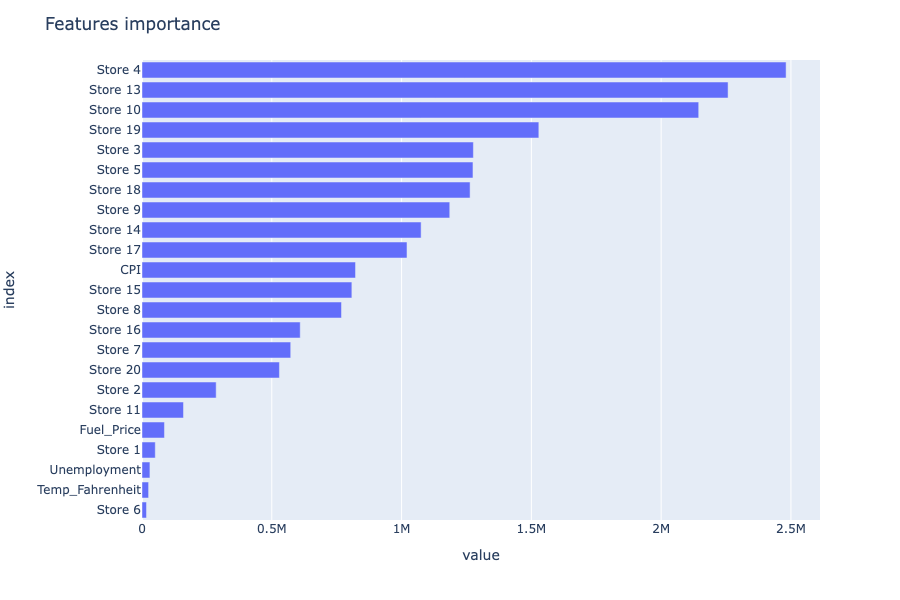

In [35]:
# Display the graph on GitHub 
# --------------------------------------------------------------------
from IPython.display import Image, display
Image(filename="graph_walmart_feature_imp.png")

### **CONCLUSION** : 🔍
 - Our model of Linear Regression after selecting features with Forward Selection works pretty well! 
 - We can affirm that beacause when comparing the R2 Score from the Train and R2 Score from the test, both are very close from each other and from the value 1 
- This means that the SSR is low so the difference between the real y and the prediction is low 
- Thanks to the analysis of features thanks to coefficients we can clearly see that some Stores and especilly the n°4 are impacting Weekly Sales as the CPI factor 
- No overfitting is detected here but in the next part we will try to put more constraints to our loss function in order to minimize it and ideally obtain a even better model thanks to regularization technics (Ridge and Lasso)


******

## 🔷 **PART 3️⃣** : Fight overfitting 👊

-----

#### ✋ **REGULARIZATION WITH RIDGE** (L2️⃣) & **Cross Validation** ⚡

💡With **Ridge regulation the goal** here is to find the best alpha (also named lambda in the mathematical theory) which is the **regularization strength**  : 

- Here we are trying to fit even more closer to the point by playing on Beta1 coefficient on the formula : MSE + multicating alpha with sum of squared coefficients

- Higher alpha means a stronger regularization and reducing Variance (and reciprocly increasing Biais)

In [36]:
print('**************************************************************************')
print('--------------------     Regularizing with RIDGE...   --------------------')
print('**************************************************************************')
print()

print('                  .')
print('                  .')
print('                  .')

ridge_model = Ridge()

params = {
    'alpha' : [0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003,  0.005, 0.01, 0, 0.1, 1.0, 10, 20, 30],
    'max_iter': [100, 200, 500, 1000, 5000, 10000],
    'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
} 

ridge_grid_search = GridSearchCV(ridge_model, param_grid=params, cv=10)
ridge_grid_search.fit(X_train, Y_train) 

print()
print('**************************************************************************')
print('--------------------             ... Done.            --------------------')
print('**************************************************************************')

print()
print() 

print('Predictions ...')
print()
ridge_Y_train_pred = ridge_grid_search.predict(X_train)
ridge_Y_test_pred = ridge_grid_search.predict(X_test)
print('Pred on train : ', ridge_Y_train_pred[0:5])
print('Pred on test : ', ridge_Y_train_pred[0:5])

print()
print()
print('--------------------------------------------------------------------------')
print('******************       A L P H A   T U N I N G        ******************')
print('--------------------------------------------------------------------------')
print()

print("Best hyperparameters : ", ridge_grid_search.best_params_)
print()
print("Best R2 score : ", ridge_grid_search.best_score_)

print()
print() 
print()
print('--------------------------------------------------------------------------')
print('******************         P E R F O R M A N C E S      ******************')
print('--------------------------------------------------------------------------')
print()

print("R2 score on training set : ", ridge_grid_search.score(X_train, Y_train))
print()
print("R2 score on test set : ", ridge_grid_search.score(X_test, Y_test))

print()
print()
print('**************************************************************************')
print('----------------------------      E N D     ------------------------------')
print('**************************************************************************')

**************************************************************************
--------------------     Regularizing with RIDGE...   --------------------
**************************************************************************

                  .
                  .
                  .

**************************************************************************
--------------------             ... Done.            --------------------
**************************************************************************


Predictions ...

Pred on train :  [[ 425413.95160516]
 [2308713.67768276]
 [1061772.49738344]
 [1135865.77110127]
 [ 618725.28302091]]
Pred on test :  [[ 425413.95160516]
 [2308713.67768276]
 [1061772.49738344]
 [1135865.77110127]
 [ 618725.28302091]]


--------------------------------------------------------------------------
******************       A L P H A   T U N I N G        ******************
--------------------------------------------------------------------------

Best h

#### ✋ **REGULARIZATION WITH LASSO** (L1️⃣ ) & **Cross Validation** ⚡

💡With **Lasso regulation** follow the same logic and mathematical formula except that instead of squaring beta1 coefficients, we take their absolute values meaning that we are more drastic 

- Feature selection is done and certain features can be ignored 

In [37]:
print('**************************************************************************')
print('--------------------     Regularizing with LASSO...   --------------------')
print('**************************************************************************')
print()

print('                  .')
print('                  .')
print('                  .')

lasso_model = Lasso(tol=1e-2, max_iter=10000)

params = {
    'alpha' : [10.5, 10.6, 10.65, 10.7, 10.75, 12, 13, 20, 21, 22, 23, 24, 25, 26, 30],
}

lasso_grid_search = GridSearchCV(lasso_model, param_grid=params, cv=10)
lasso_grid_search.fit(X_train, Y_train) 

print()
print('**************************************************************************')
print('--------------------             ... Done.            --------------------')
print('**************************************************************************')

print()

print('Predictions ...')
print()
lasso_Y_train_pred = lasso_grid_search.predict(X_train)
lasso_Y_test_pred = lasso_grid_search.predict(X_test)
print('Pred on train : ', lasso_Y_train_pred[0:5])
print('Pred on test : ', lasso_Y_train_pred[0:5])

print() 
print()
print('--------------------------------------------------------------------------')
print('******************       A L P H A   T U N I N G        ******************')
print('--------------------------------------------------------------------------')
print()

print("Best hyperparameters : ", lasso_grid_search.best_params_)
print()
print("Best R2 score : ", lasso_grid_search.best_score_)

print()
print() 
print()
print('--------------------------------------------------------------------------')
print('******************         P E R F O R M A N C E S      ******************')
print('--------------------------------------------------------------------------')
print()

print("R2 score on training set : ", lasso_grid_search.score(X_train, Y_train))
print()
print("R2 score on test set : ", lasso_grid_search.score(X_test, Y_test))

print()
print()
print('**************************************************************************')
print('----------------------------      E N D     ------------------------------')
print('**************************************************************************')

**************************************************************************
--------------------     Regularizing with LASSO...   --------------------
**************************************************************************

                  .
                  .
                  .

**************************************************************************
--------------------             ... Done.            --------------------
**************************************************************************

Predictions ...

Pred on train :  [ 419800.29666138 2305384.83852694 1058699.75215508 1134403.86617025
  617874.34587875]
Pred on test :  [ 419800.29666138 2305384.83852694 1058699.75215508 1134403.86617025
  617874.34587875]


--------------------------------------------------------------------------
******************       A L P H A   T U N I N G        ******************
--------------------------------------------------------------------------

Best hyperparameters :  {'alpha':

### 📌 **Comparing all models performances** 📈

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

In [38]:
print('*****************************************************************************')
print('--------------- C O M P A R I N G    P E R F O R M A N C E S ----------------')
print('*****************************************************************************')
print()
print()

print('------------------------------ All Performances -----------------------------')
print()
print("LINEAR REGRESSION /  R2 score on training set :", r2_score(Y_train, Y_train_pred))
print("LINEAR REGRESSION /  R2 score on test set :", r2_score(Y_test, Y_test_pred))
print('LINEAR REGRESSION / Train Mean Absolute Error (MAE) : ', mean_absolute_error(Y_train, Y_train_pred))
print('LINEAR REGRESSION / Test Mean Absolute Error (MAE) : ', mean_absolute_error(Y_test, Y_test_pred))
print()
print("RIDGE / R2 score on training set : ", ridge_grid_search.score(X_train, Y_train))
print("RIDGE / R2 score on test set : ", ridge_grid_search.score(X_test, Y_test))
print('RIDGE  / Train Mean Absolute Error (MAE) : ', mean_absolute_error(Y_train, ridge_Y_train_pred))
print('RIDGE  / Test Mean Absolute Error (MAE) : ', mean_absolute_error(Y_test, ridge_Y_test_pred))
print()
print("LASSO / R2 score on training set : ", lasso_grid_search.score(X_train, Y_train))
print("LASSO / R2 score on test set : ", lasso_grid_search.score(X_test, Y_test))
print('LASSO / Train Mean Absolute Error (MAE) : ', mean_absolute_error(Y_train, lasso_Y_train_pred))
print('LASSO / Test Mean Absolute Error (MAE) : ', mean_absolute_error(Y_test, lasso_Y_test_pred))

print()
print()

print('-------------------------------- Best Model ---------------------------------')
print()
print('Best model performances is :', lasso_grid_search)
print()
print()
print('*****************************************************************************')
print('----------------------------------- E N D -----------------------------------')
print('*****************************************************************************')

*****************************************************************************
--------------- C O M P A R I N G    P E R F O R M A N C E S ----------------
*****************************************************************************


------------------------------ All Performances -----------------------------

LINEAR REGRESSION /  R2 score on training set : 0.9768816466775677
LINEAR REGRESSION /  R2 score on test set : 0.9572584747991985
LINEAR REGRESSION / Train Mean Absolute Error (MAE) :  70453.33203904836
LINEAR REGRESSION / Test Mean Absolute Error (MAE) :  114995.6959375047

RIDGE / R2 score on training set :  0.9765638131450701
RIDGE / R2 score on test set :  0.9600666645419573
RIDGE  / Train Mean Absolute Error (MAE) :  69623.2060184201
RIDGE  / Test Mean Absolute Error (MAE) :  110915.14674996576

LASSO / R2 score on training set :  0.9762773001645002
LASSO / R2 score on test set :  0.9607525170200826
LASSO / Train Mean Absolute Error (MAE) :  69714.74381426512
LASSO / Test

In [39]:
scores = []

# Adding LINEAR MODEL to the scores list 
#---------------------------------------------------------------------------------
scores.append({'name_model': 'LINEAR',
                'model': 'Linear Regression', 
                'R2_SCORE' : r2_score(Y_train, Y_train_pred),
                'set' : 'train'})

scores.append({'name_model': 'LINEAR',
                'model': 'Linear Regression', 
                'R2_SCORE' : r2_score(Y_test, Y_test_pred),
                'set' : 'test'})

# Adding RIDGE MODEL to the scores list 
#---------------------------------------------------------------------------------
scores.append({'name_model': 'RIDGE',
                'model': 'Ridge Regul', 
                'R2_SCORE' : ridge_grid_search.score(X_train, Y_train),
                'set' : 'train'})

scores.append({'name_model': 'RIDGE',
                'model': 'Ridge Regul', 
                'R2_SCORE' : ridge_grid_search.score(X_test, Y_test),
                'set' : 'test'})

# Adding LASSO MODEL to the scores list 
#---------------------------------------------------------------------------------
scores.append({'name_model': 'LASSO',
                'model': 'Lasso Regul', 
                'R2_SCORE' : lasso_grid_search.score(X_train, Y_train),
                'set' : 'train'})

scores.append({'name_model': 'LASSO',
                'model': 'Lasso Regul', 
                'R2_SCORE' : lasso_grid_search.score(X_test, Y_test),
                'set' : 'test'})

In [40]:
df = pd.DataFrame(columns=['name_model', 'model', 'R2_SCORE', 'set'])
df_results = pd.DataFrame(scores, columns=['name_model', 'model', 'R2_SCORE', 'set'])

In [41]:
perf_final_df = pd.concat([df, df_results])

In [42]:
perf_final_df = perf_final_df.sort_values(by = ['set', 'R2_SCORE'], ascending = False)

In [43]:
perf_final_df = perf_final_df.sort_values(by = ['set', 'R2_SCORE'], ascending = False)
fig = px.bar(perf_final_df, x = "model", y = 'R2_SCORE', color = 'set', barmode = 'group', width = 1000, height=700, title='Comparing visually Models performances')
fig.show()

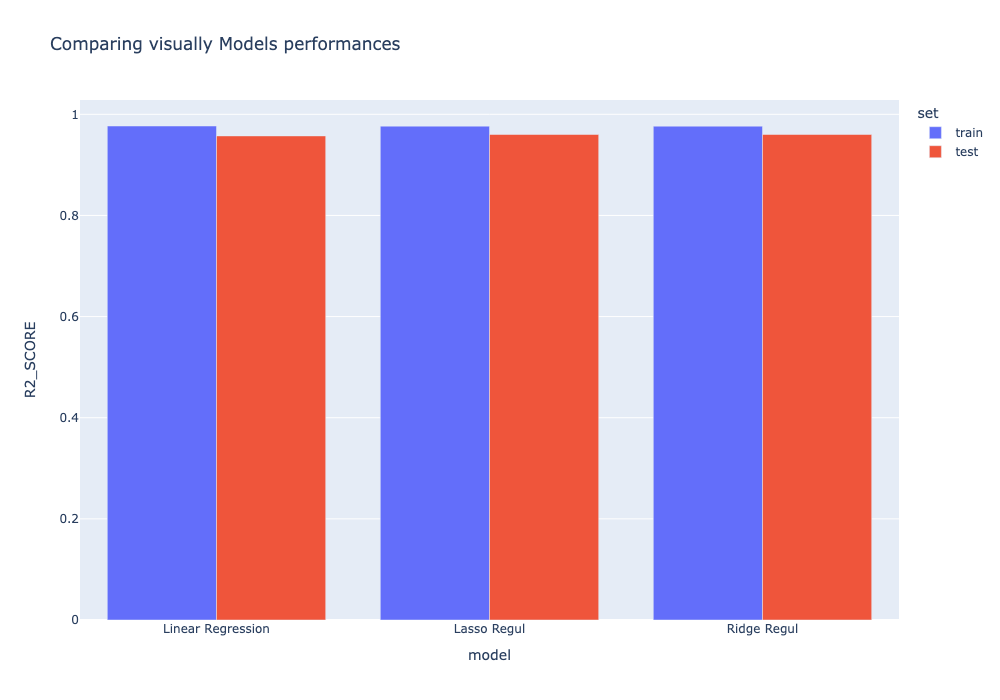

In [44]:
# Display the graph on GitHub 
# --------------------------------------------------------------------
from IPython.display import Image, display
Image(filename="graph_walmart_comparing_perf.png")

---

## **CONCLUSION** : ✅

- ##### We can gather Walmart Team and explain them we make **3 differents Machine Learning models** that takes into account differents variables like the <ins>*Temperature, the price of Fuel, the CPI, the umployment rate, the Store and the period of holiday of not*</ins> in order to predict with best accuracy possible the **weekly sales from their Stores.** 
- ##### We can conclude from this project by saying that the <ins>3 models of predictions</ins>  we build are near in term of **predictive power (R2 Score)** BUT <ins>**Model regularized with RIDGE has the best performances** :</ins> 
        - Mean Absolute Error (MAE) on the test is the smallest which means the predictions made by this model are the closest from reality 


---

----